# Frame Classification using ResNet + LSTM with value normalization

This notebook creates and trains an LSTM based classifier with a dataset build arround nromalized feature vectors of dimension 512.

In [1]:
from utils2 import *
import os
import pandas as pd

%load_ext autoreload
%autoreload 2

## Train models

We will use the best configuration we found with our wandb project

In [2]:
best_config = {
    'abs_path': '../', # project path 
    'sequence_length': 300, 
    'backbone': 'resnet',
    'layers': 'lstm',
    'dropout_rate': 0.5,
    'num_layers': 2,
    'num_units': 256,
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': 32,
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
    'norm' : True,
    'num_heads' : 1,
    'model_name' : 'lstm512_norm'
}

## Final model Training & Evaluation

(307, 300, 512) (307, 300, 2)
(122, 300, 512) (122, 300, 2)
Running experiment for Grooming
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6966 - fn: 2598.3999 - fp: 16640.4004 - loss: 0.6885 - prc: 0.1900 - precision: 0.1851 - recall: 0.4559 - tn: 30543.8008 - tp: 2627.3999
Epoch 1: val_loss improved from inf to 0.58718, saving model to lstm512_norm_grooming.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 72s 6s/step - accuracy: 0.6859 - fn: 2731.3635 - fp: 18283.5449 - loss: 0.6893 - prc: 0.1888 - precision: 0.1808 - recall: 0.4670 - tn: 32109.9082 - tp: 2893.3635 - val_accuracy: 0.8879 - val_fn: 1044.0000 - val_fp: 3059.0000 - val_loss: 0.5872 - val_prc: 0.5375 - val_precision: 0.4504 - val_recall: 0.7060 - val_tn: 29990.0000 - val_tp: 2507.0000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6712 - fn: 1345.5000 - fp: 17943.1992 - loss: 0.6630 - prc: 0.4167 - precision: 0.2780 - recall: 0.7226 - tn: 28728.4004 - tp: 4392.8999
Epoch 2: val_loss did not improve from 0

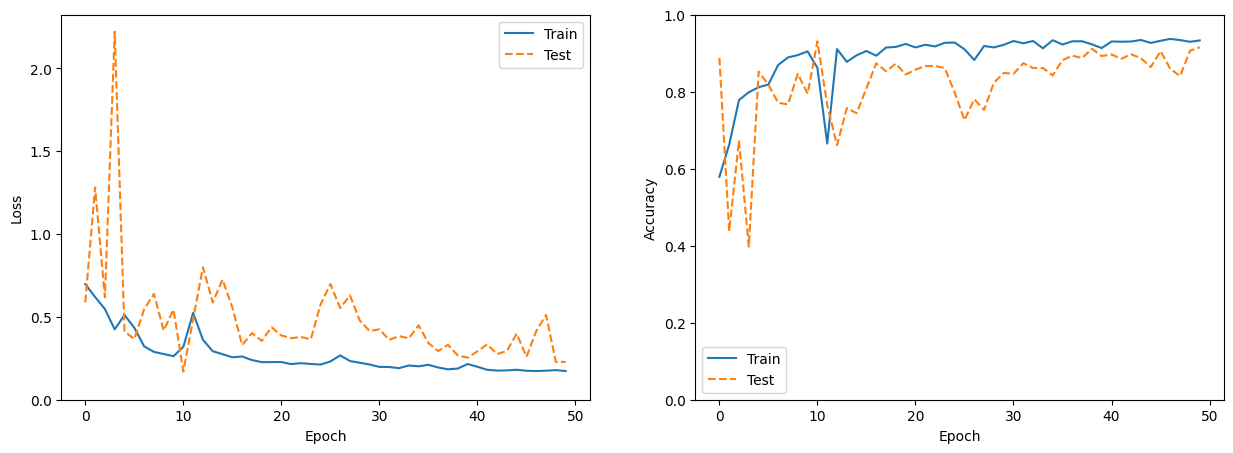

10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step


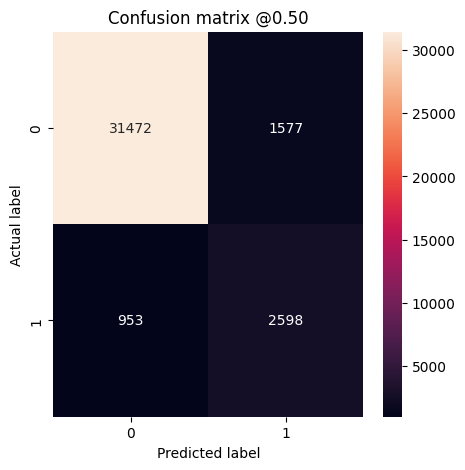

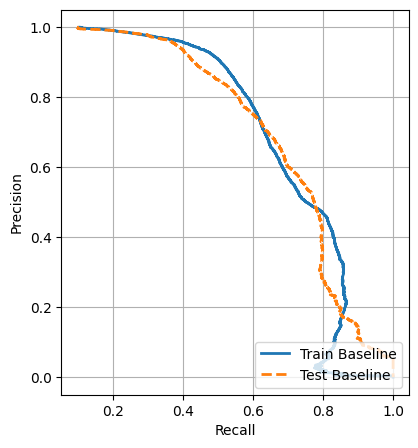

Running experiment for Rearing


/Users/saraalbarran/Documents/SARA/ratolins/AutomatedMouseBehaviorRecognition/notebooks/utils2.py:381: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics = pd.concat([


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4730 - fn: 5440.2998 - fp: 21564.4004 - loss: 0.7134 - prc: 0.2768 - precision: 0.2568 - recall: 0.5797 - tn: 17405.4004 - tp: 7999.8999
Epoch 1: val_loss improved from inf to 0.63110, saving model to lstm512_norm_rearing.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 146s 12s/step - accuracy: 0.4742 - fn: 5703.9092 - fp: 23147.1816 - loss: 0.7125 - prc: 0.2805 - precision: 0.2597 - recall: 0.5865 - tn: 18455.0000 - tp: 8712.0908 - val_accuracy: 0.7955 - val_fn: 1982.0000 - val_fp: 5502.0000 - val_loss: 0.6311 - val_prc: 0.2771 - val_precision: 0.2376 - val_recall: 0.4639 - val_tn: 27401.0000 - val_tp: 1715.0000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5595 - fn: 4471.7998 - fp: 18381.5996 - loss: 0.6730 - prc: 0.4303 - precision: 0.3454 - recall: 0.6919 - tn: 20281.1992 - tp: 9275.4004
Epoch 2: val_loss improved from 0.63110 to 0.56511, saving model to lstm512_norm_rearing.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/st

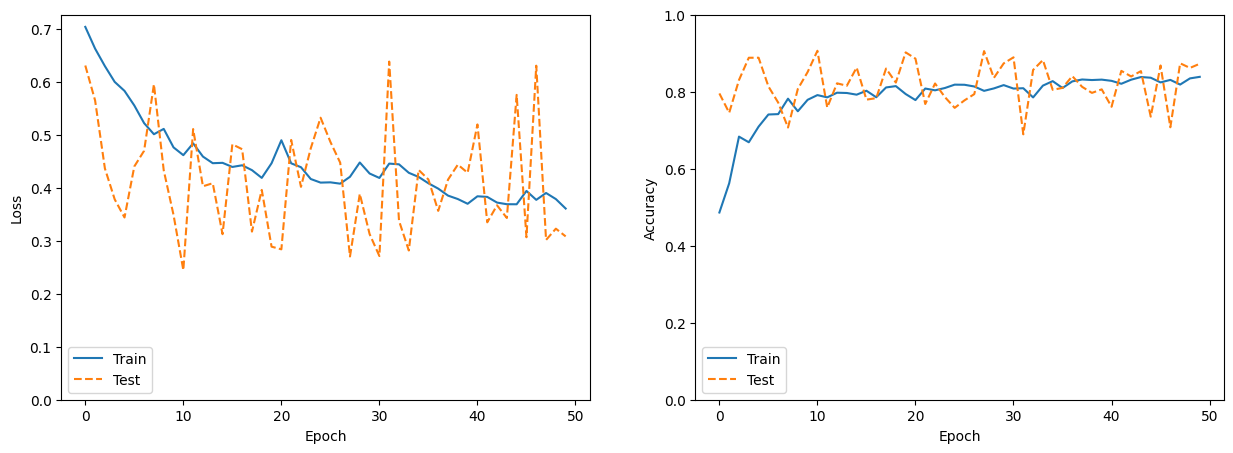

10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 26s/step


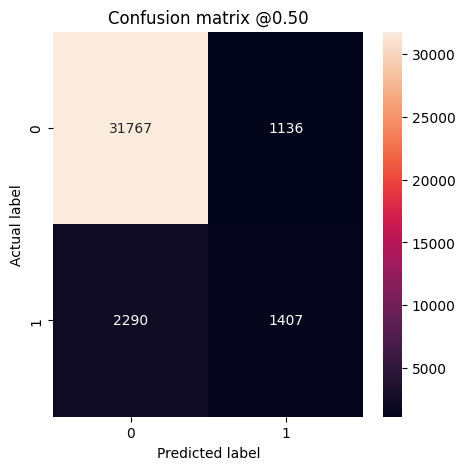

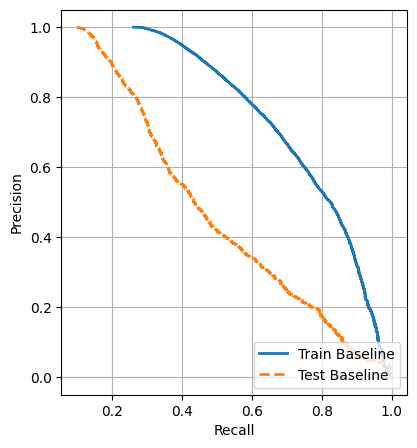

In [4]:
metrics = train_test_model(best_config)

## Evaluate model

On the following section we will evaluate the model on the validation set. 

In [5]:
from evaluation_utils import *
import keras
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Load validation data
path = '../data/processed/Dataset/'
val_data = load_dataset(path, 'resnet')
print('Validation videos: ', val_data.keys())

# Per each video, generate sequences
val_seq = {}
for i in list(val_data.keys()):
    X, Y = generate_sequences(val_data[i], 300, normalize=True)
    val_seq[i] = [X, Y]

behaviours = ['Grooming', 'Rearing']

# We will load the models
if 'Grooming' in behaviours:
    model_grooming = keras.models.load_model('lstm512_norm_grooming.keras', compile=True)
if 'Rearing' in behaviours:
    model_rearing = keras.models.load_model('lstm512_norm_rearing.keras', compile=True)

# Create 2 dataframes to store metrics for each behaviour
metrics_g = pd.DataFrame(columns=['Accuracy', 'Precission', 'Recall', 'PRC'], index=list(val_data.keys()))
metrics_r = pd.DataFrame(columns=['Accuracy', 'Precission','Recall', 'PRC'], index=list(val_data.keys()))

Validation videos:  dict_keys(['1', 'Animal62418', 'HD_ChR2_480A'])


In [15]:
metrics_g

,Accuracy,Precission,Recall,PRC
1,0.971282,0.0,0.0,0.48745
Animal62418,0.94381,0.0,0.0,0.188167
HD_ChR2_480A,0.931304,0.919266,0.721902,0.885083


In [16]:
metrics_r

,Accuracy,Precission,Recall,PRC
1,0.98,0.3,0.040541,0.122877
Animal62418,0.749683,0.347317,0.748686,0.643735
HD_ChR2_480A,0.892754,0.812594,0.468453,0.699957


### Results video 1.mp4

In [9]:
X, Y = val_seq['1']

# Append metrics to dataset
metrics_g.loc['1'] = model_grooming.evaluate(X, Y[:,:,0])[-4:]
metrics_r.loc['1'] = model_rearing.evaluate(X, Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.9713 - fn: 112.0000 - fp: 0.0000e+00 - loss: 0.0709 - prc: 0.4874 - precision: 0.0000e+00 - recall: 0.0000e+00 - tn: 3788.0000 - tp: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.9800 - fn: 71.0000 - fp: 7.0000 - loss: 0.0816 - prc: 0.1229 - precision: 0.3000 - recall: 0.0405 - tn: 3819.0000 - tp: 3.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step


We will start by plotting the labels and actual predictions along the video frames.


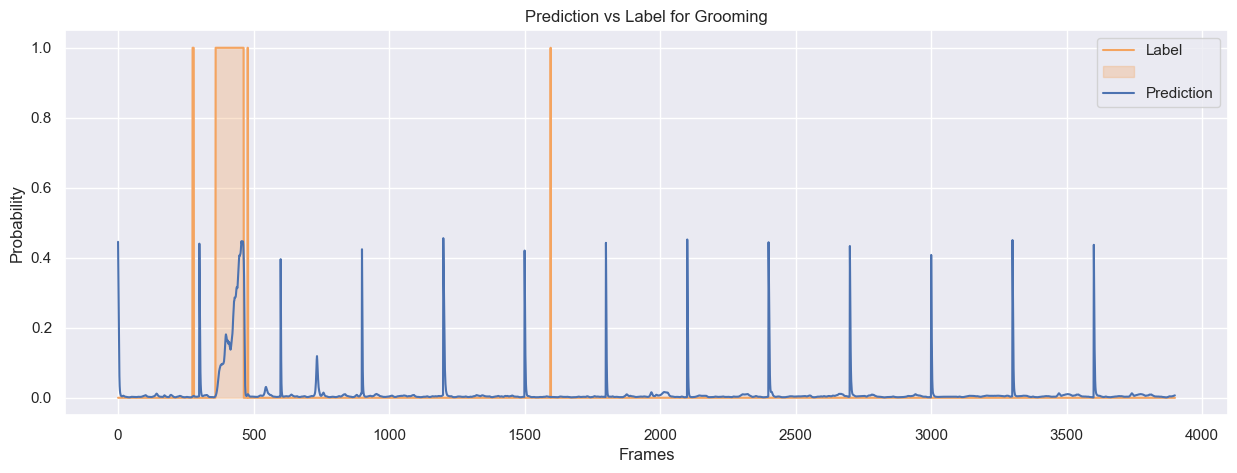

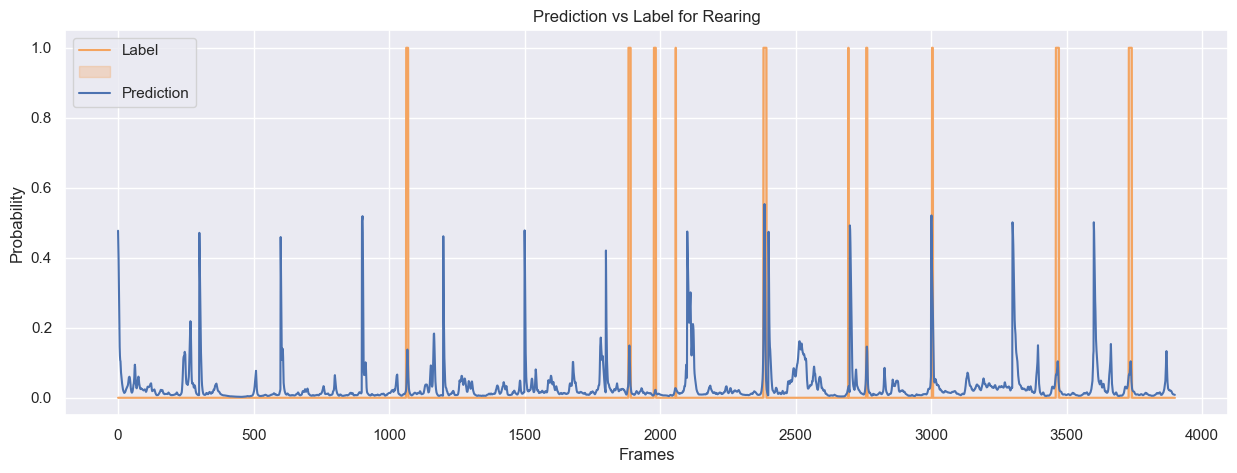

We will compute the PRC curve to choose the best threshold.


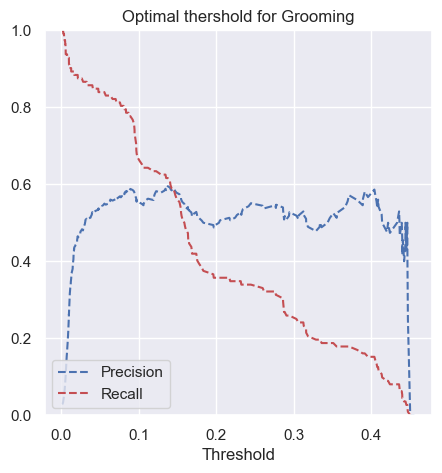

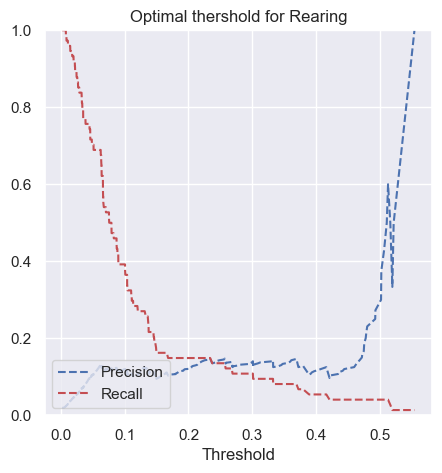

Lastly we will plot the confussion matrix for each behaviour


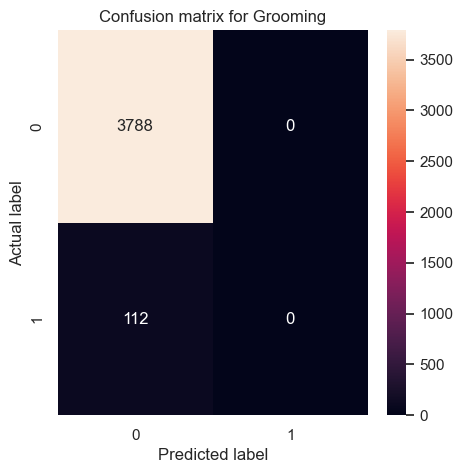

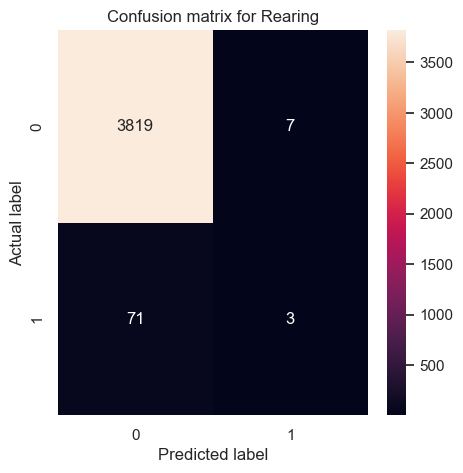

In [10]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)

### Results video Animal62418.mp4

In [11]:
X, Y = val_seq['Animal62418']

# Append metrics to dataset
metrics_g.loc['Animal62418'] = model_grooming.evaluate(X, Y[:,:,0])[-4:]
metrics_r.loc['Animal62418'] = model_rearing.evaluate(X, Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.9438 - fn: 354.0000 - fp: 0.0000e+00 - loss: 0.2265 - prc: 0.1882 - precision: 0.0000e+00 - recall: 0.0000e+00 - tn: 5946.0000 - tp: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.7497 - fn: 239.0000 - fp: 1338.0000 - loss: 0.4794 - prc: 0.6437 - precision: 0.3473 - recall: 0.7487 - tn: 4011.0000 - tp: 712.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step


We will start by plotting the labels and actual predictions along the video frames.


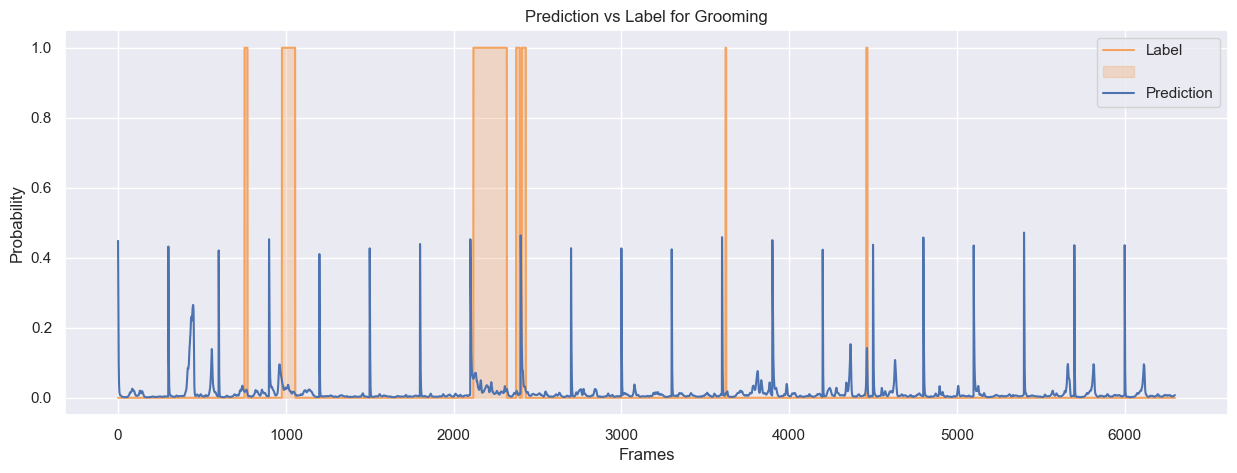

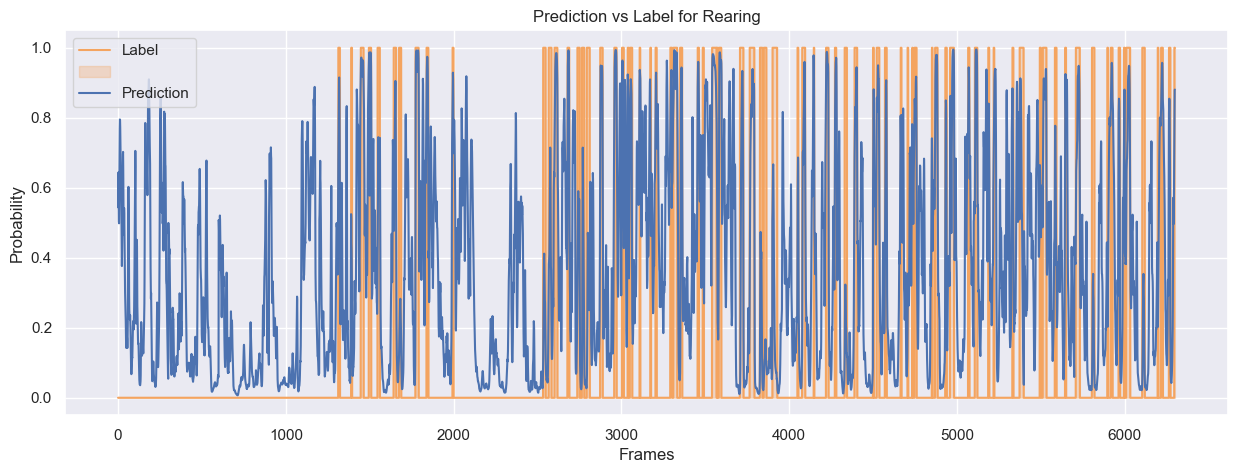

We will compute the PRC curve to choose the best threshold.


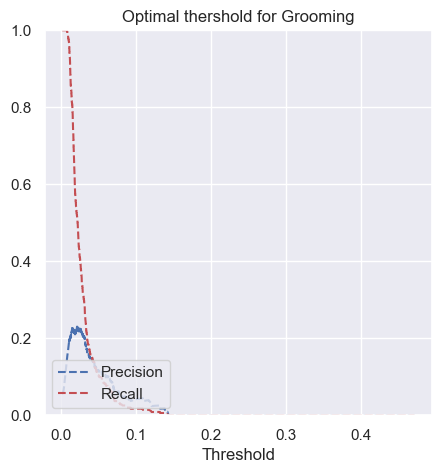

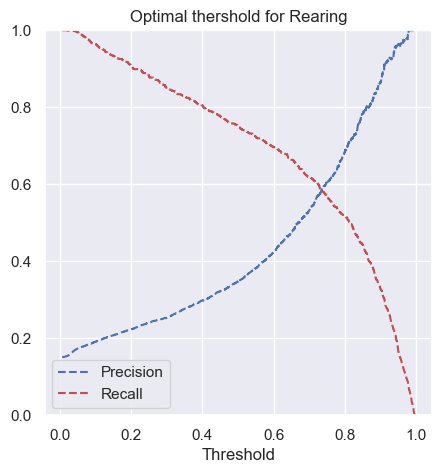

Lastly we will plot the confussion matrix for each behaviour


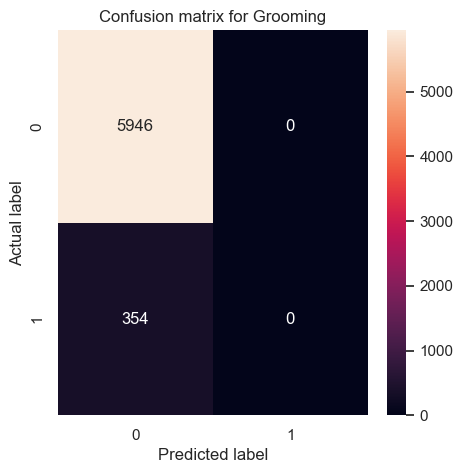

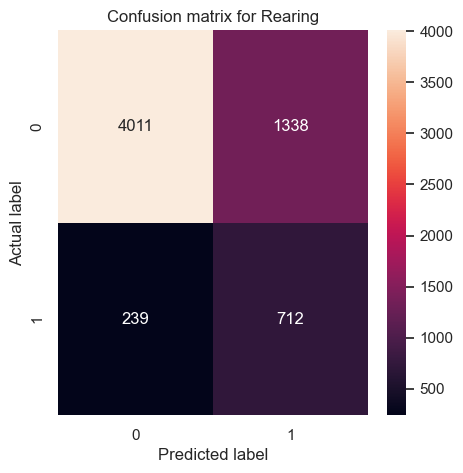

In [12]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)

### Results video HD_ChR2_480A.mp4

In [13]:
X, Y = val_seq['HD_ChR2_480A']

# Append metrics to dataset
metrics_g.loc['HD_ChR2_480A'] = model_grooming.evaluate(X, Y[:,:,0])[-4:]
metrics_r.loc['HD_ChR2_480A'] = model_rearing.evaluate(X, Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.9313 - fn: 386.0000 - fp: 88.0000 - loss: 0.2061 - prc: 0.8851 - precision: 0.9193 - recall: 0.7219 - tn: 5424.0000 - tp: 1002.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.8928 - fn: 615.0000 - fp: 125.0000 - loss: 0.2791 - prc: 0.7000 - precision: 0.8126 - recall: 0.4685 - tn: 5618.0000 - tp: 542.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step


We will start by plotting the labels and actual predictions along the video frames.


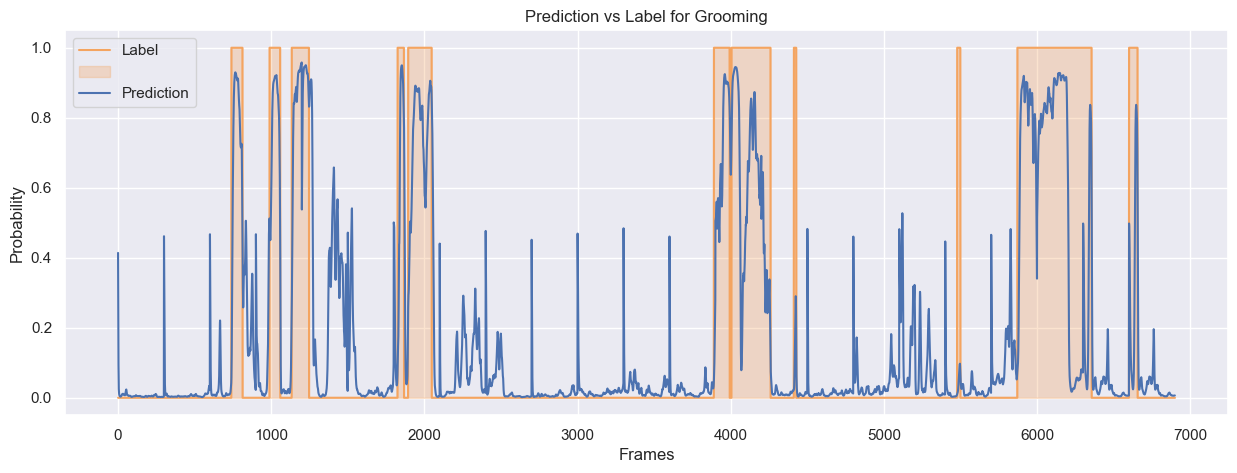

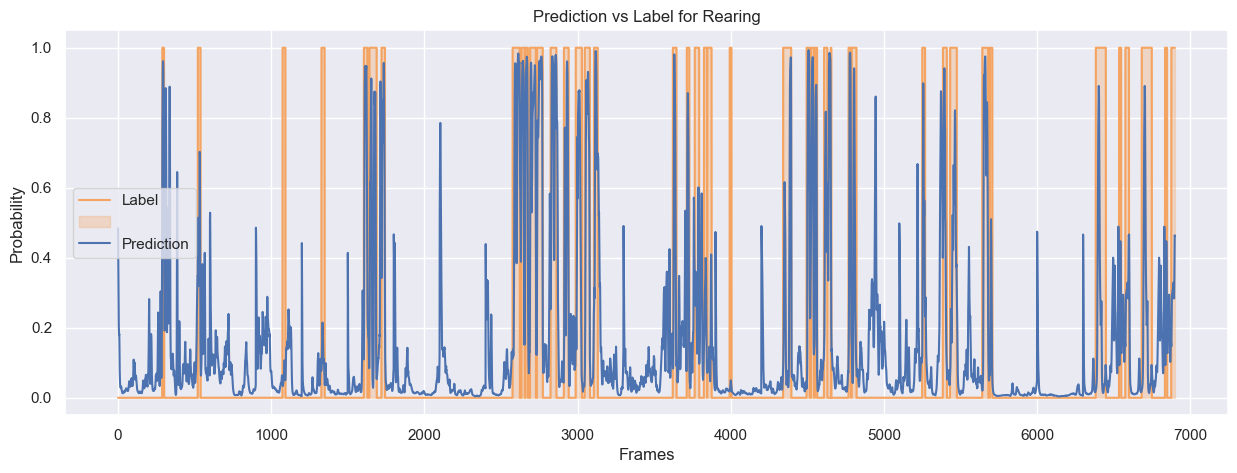

We will compute the PRC curve to choose the best threshold.


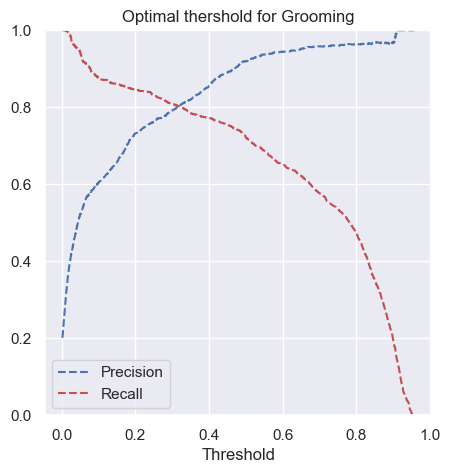

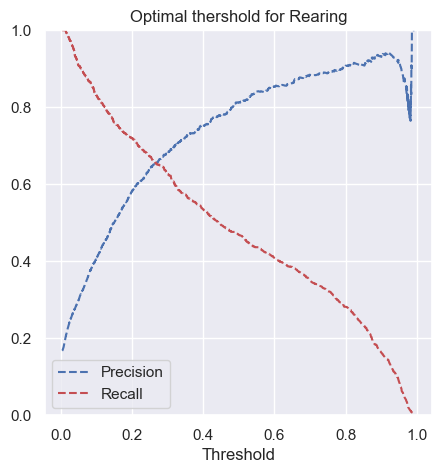

Lastly we will plot the confussion matrix for each behaviour


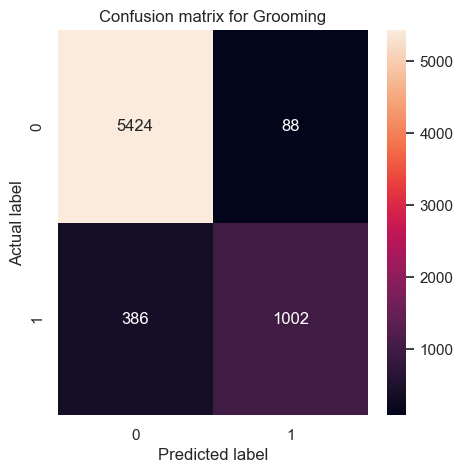

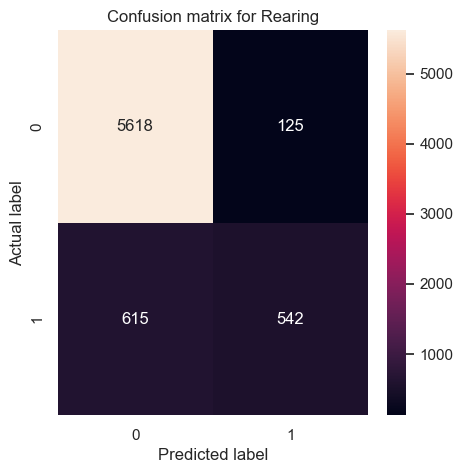

In [14]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)